In [13]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

from sklearn.model_selection import train_test_split

import cufflinks as cf
import chart_studio.plotly as py
from chart_studio.plotly import plot,iplot
import chart_studio.tools as tls
import plotly.graph_objs as go
import plotly.express as px

In [14]:
#set plotly credentials

tls.set_credentials_file(username= 'aryakr',api_key='P9S7kC8W7CHtheuHuHKZ')

In [15]:
#Load data

df = pd.read_csv(r'C:\Arya KR\PERSONAL\Python\My projects\Water_potability\water_potability.csv')

In [16]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [18]:
#Finding columns with missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

>ph,Sulfate,Trihalomethanes have null values.  
Sulfate has more than 25% null values so remove that column.

<AxesSubplot:>

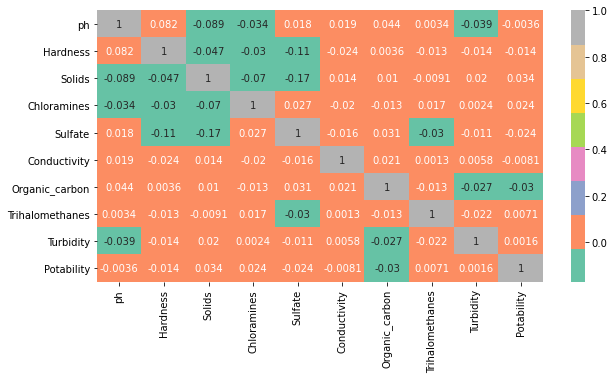

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Set2')

In [20]:
#Fill for missing values with apropriate values

for col in df.columns:
    if (df[col].isnull().sum() > 0) == True:
        df[col].fillna(df[col].mean(),inplace = True)

In [21]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

> No missing values.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Visualizations

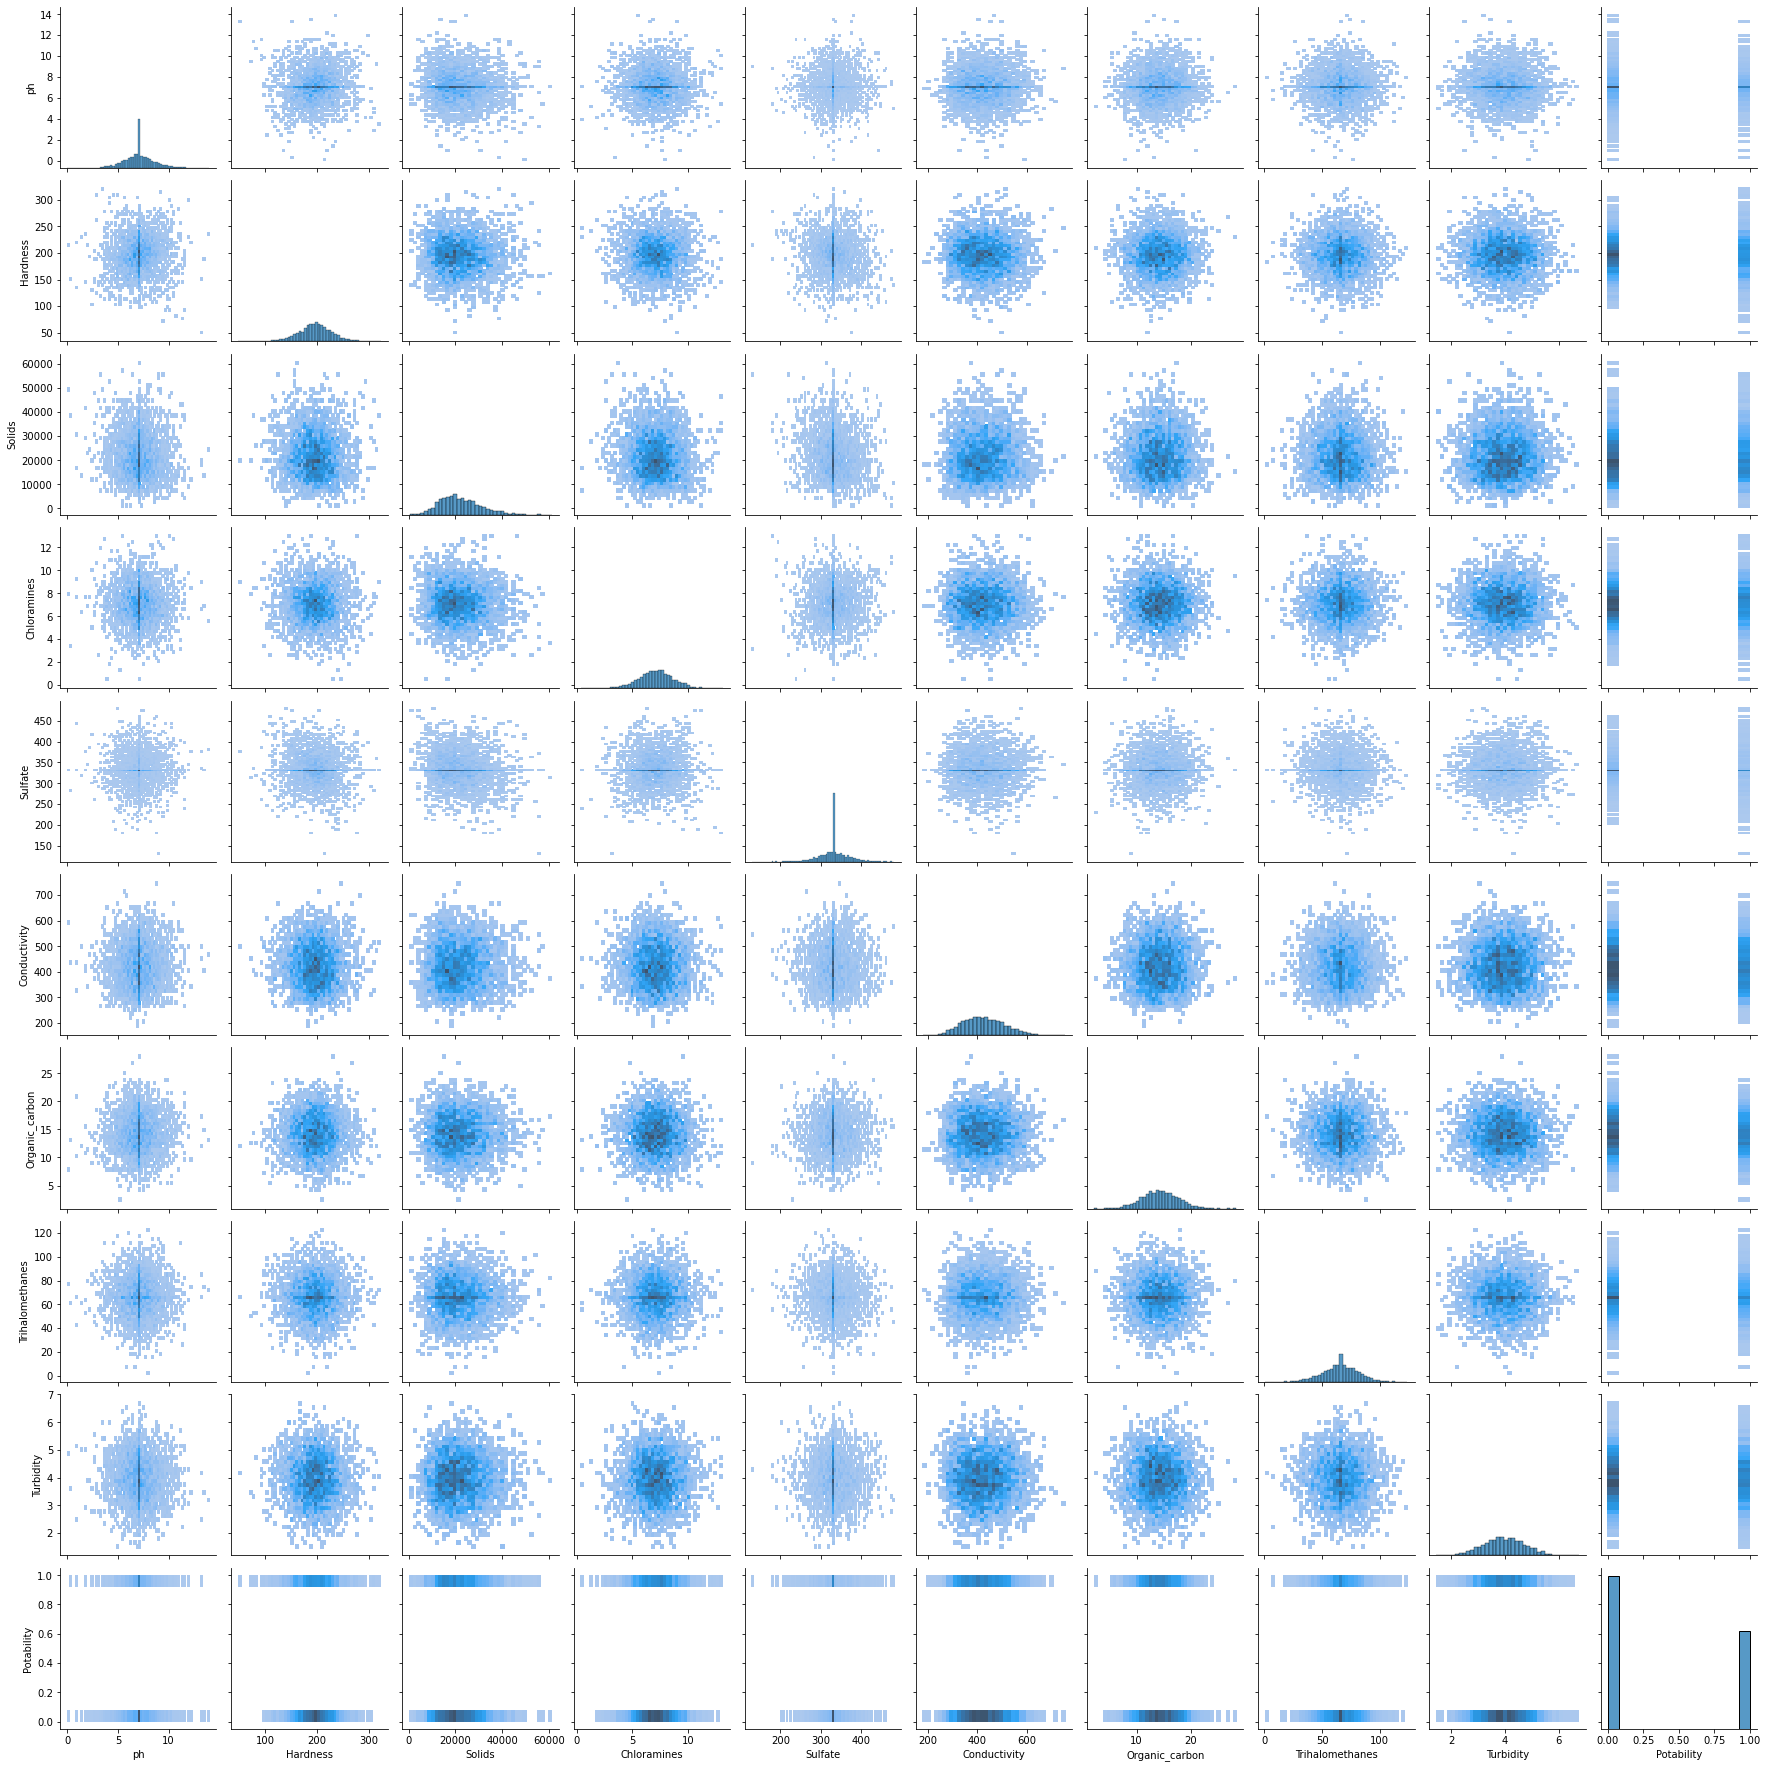

In [11]:
sns.pairplot(df,kind = 'hist')

In [24]:
print(df['Potability'].value_counts())

plt.figure(figsize=(5,5))
p = pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(p, values='Potability', names=['Potable','Not Potable'],color = 'Potability',hole=0.4,opacity=0.6,
             color_discrete_sequence=['red','yellow'],title = 'Number of Potable and Not potable values')
fig.show()

0    1998
1    1278
Name: Potability, dtype: int64


<Figure size 360x360 with 0 Axes>

In [25]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<AxesSubplot:xlabel='ph', ylabel='Hardness'>

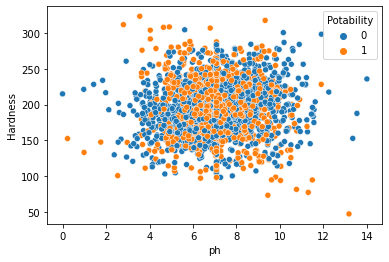

In [26]:
sns.scatterplot(data = df,x = df['ph'],y = df['Hardness'],hue = df.Potability )

<AxesSubplot:xlabel='Turbidity', ylabel='Hardness'>

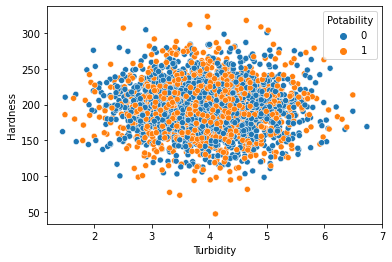

In [27]:
sns.scatterplot(data = df,x = df['Turbidity'],y = df['Hardness'],hue = df.Potability)

Now Split the dataset into train and test 

In [28]:
y = df['Potability']
x = df.drop(['Potability'],axis = 1)

In [29]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

features= x.columns
x[features] = sc.fit_transform(x[features])

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size =  0.1 ,random_state = 42)

Now apply models to Test and Train datasets

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

**Logistic regression**

In [33]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)

print('Accuracy score is ',accuracy_score(y_test,y_pred_lg))
print('confusion matrix \n',confusion_matrix(y_test,y_pred_lg))
print('f1 score',f1_score(y_test,y_pred_lg))

Accuracy score is  0.6219512195121951
confusion matrix 
 [[204   0]
 [124   0]]
f1 score 0.0


**SVM**

In [34]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)

cm_svm = confusion_matrix(y_test,y_pred_svm)
print(cm_svm)
print('accuracy: ',accuracy_score(y_test,y_pred_svm))
print('Pricision score: ',precision_score(y_test,y_pred_svm))
print('Recall score: ', recall_score(y_test,y_pred_svm))
print('F1 score: ', f1_score(y_test,y_pred_svm))

[[189  15]
 [ 82  42]]
accuracy:  0.7042682926829268
Pricision score:  0.7368421052631579
Recall score:  0.3387096774193548
F1 score:  0.4640883977900552


**Naive_bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

cm_nb = confusion_matrix(y_test,y_pred_nb)
print(cm_nb)
print('accuracy: ',accuracy_score(y_test,y_pred_nb))
print('Pricision score: ',precision_score(y_test,y_pred_nb))
print('Recall score: ', recall_score(y_test,y_pred_nb))
print('F1 score: ', f1_score(y_test,y_pred_nb))

[[182  22]
 [ 99  25]]
accuracy:  0.6310975609756098
Pricision score:  0.5319148936170213
Recall score:  0.20161290322580644
F1 score:  0.29239766081871343


**DecisionTree**

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=42, min_samples_leaf=1, random_state=42)
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

cm_dtc = confusion_matrix(y_test,y_pred_dtc)
print(cm_dtc)
print('accuracy: ',accuracy_score(y_test,y_pred_dtc))
print('Pricision score: ',precision_score(y_test,y_pred_dtc))
print('Recall score: ', recall_score(y_test,y_pred_dtc))
print('F1 score: ', f1_score(y_test,y_pred_dtc))

[[144  60]
 [ 62  62]]
accuracy:  0.6280487804878049
Pricision score:  0.5081967213114754
Recall score:  0.5
F1 score:  0.5040650406504066


**RandomForest**

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 1)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

cm_rfc = confusion_matrix(y_test,y_pred_rfc)
print(cm_rfc)
print('accuracy: ',accuracy_score(y_test,y_pred_rfc))
print('Pricision score: ',precision_score(y_test,y_pred_rfc))
print('Recall score: ', recall_score(y_test,y_pred_rfc))
print('F1 score: ', f1_score(y_test,y_pred_rfc))

[[184  20]
 [ 81  43]]
accuracy:  0.6920731707317073
Pricision score:  0.6825396825396826
Recall score:  0.3467741935483871
F1 score:  0.45989304812834225


**KNeighborsClassifier**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

cm_knn = confusion_matrix(y_test,y_pred_knn)
print(cm_knn)
print('accuracy: ',accuracy_score(y_test,y_pred_knn))
print('Pricision score: ',precision_score(y_test,y_pred_knn))
print('Recall score: ', recall_score(y_test,y_pred_knn))
print('F1 score: ', f1_score(y_test,y_pred_knn))

[[178  26]
 [ 90  34]]
accuracy:  0.6463414634146342
Pricision score:  0.5666666666666667
Recall score:  0.27419354838709675
F1 score:  0.3695652173913043


In [39]:
print('lg Accuracy score is ',accuracy_score(y_test,y_pred_lg))
print('svm  Accuracy score is ',accuracy_score(y_test,y_pred_svm))
print('nb Accuracy score is ',accuracy_score(y_test,y_pred_nb))
print('dtc Accuracy score is ',accuracy_score(y_test,y_pred_dtc))
print('rfc Accuracy score is ',accuracy_score(y_test,y_pred_rfc))
print('knn Accuracy score is ',accuracy_score(y_test,y_pred_knn))

lg Accuracy score is  0.6219512195121951
svm  Accuracy score is  0.7042682926829268
nb Accuracy score is  0.6310975609756098
dtc Accuracy score is  0.6280487804878049
rfc Accuracy score is  0.6920731707317073
knn Accuracy score is  0.6463414634146342


>SVM has more accuracy.So water potability can be predicted using SVM classification method.